## The program below extracts the features from the 4 datasets: Balabit, Chaoshen, DFL and TWOS and teaches the models extracted behaviour. 
The datasets consist of mouse actions


In [1]:
%pip install -r requirments.txt


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
## IMPORTING THE CLASSES ## 
from utils.consts import * ## const variables are there, so paths and extraction features ##
from utils. plotting import * ## plotting ##
from data_reader_babalit import * ## the class which reads balabit dataset ##
from data_reader_chaoshen import * ## the class which reads chaoshen datasets TODO There are several issues with this dataset -> explained later ##

from nonlegality_analyser import * ## the class which analyses the datasets without 0 1 labels --> splitting samples is being done there ##  
from legality_analyser import * ## the class which analyses the datasets with 0 1 labels --> splitting samples is being done there ##  

from SVMmodel import *
from RandomForestModel import *




# BALABIT DATASET FEATURE EXTRACTION

In [3]:
## Specyfing the USERS ## 
users = [7,9, 12, 15,16,20,21,23,29, 35] ## those are all users 
## Creating the object which analyses the dataset ## 
limit  = 1000
balabit_reader = DataReaderBalabit(BALABIT, users, False, limit = limit) ## the arguments are DATASET, users, supervised, how many records should be procesed ##
balabit_reader.processDataWithoutLabels() ## creating the data without labels ##



File already exist


In [4]:
## getting path from the reader ##
print(balabit_reader.fileName) 
path = balabit_reader.getFileName()

## creating analyser class ## 
balabitAnalyser = nonLegalityAnalyser(path)
## counting how many actions were extracted ## 
print(balabitAnalyser.countActions())

processed_files\balabit_dataset_users[7, 9, 12, 15, 16, 20, 21, 23, 29, 35]_limit1000_labelsFalse.csv
type_of_action     1    3    4
userid                        
7                679  812   88
9                798  830  107
12              1322  616  116
15               547  641   89
16               538  608  113
20              1141  823   95
21               704  550   90
23               494  703   61
29               357  662  112
35               672  617   94


In [5]:
from RandomForestModel import *


User 7 is being analyzed:
CV Accuracy: 0.94 (+/- 0.01)
Test Accuracy: 0.93
7: 0.969 threshold: 0.212
7: Average Precision: 0.7200156928995368
User 9 is being analyzed:
CV Accuracy: 0.97 (+/- 0.01)
Test Accuracy: 0.92
9: 0.960 threshold: 0.080
9: Average Precision: 0.7716161135629586
User 12 is being analyzed:
CV Accuracy: 0.87 (+/- 0.01)
Test Accuracy: 0.87
12: 0.826 threshold: 0.211
12: Average Precision: 0.4228870372007846
User 15 is being analyzed:
CV Accuracy: 0.91 (+/- 0.00)
Test Accuracy: 0.92
15: 0.813 threshold: 0.119
15: Average Precision: 0.26192146710171155
User 16 is being analyzed:
CV Accuracy: 0.92 (+/- 0.00)
Test Accuracy: 0.92
16: 0.766 threshold: 0.226
16: Average Precision: 0.2049388046905006
User 20 is being analyzed:
CV Accuracy: 0.91 (+/- 0.01)
Test Accuracy: 0.90
20: 0.902 threshold: 0.204
20: Average Precision: 0.6935510058475326
User 21 is being analyzed:
CV Accuracy: 0.91 (+/- 0.01)
Test Accuracy: 0.90
21: 0.829 threshold: 0.133
21: Average Precision: 0.3253962

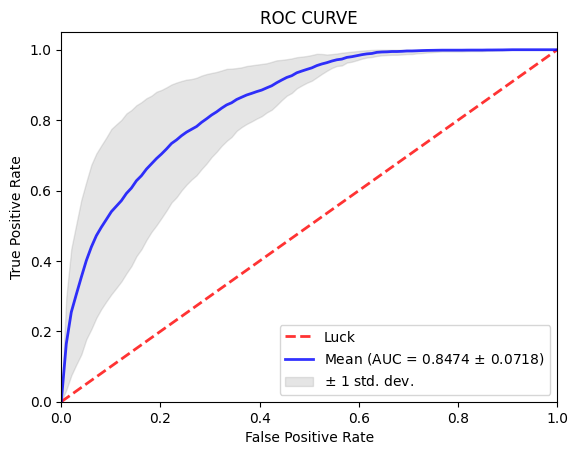

In [6]:
shuffle = True
fpr = {}
tpr = {}
roc_auc = {}
precision = {}
recall = {}
average_precision = {}
balanced = False
for legalUser in users:
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser, balanced = balanced)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]

    
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    model = RandomForestModel(dataset, users, weight = "balanced")
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    fpr[legalUser], tpr[legalUser], thr, precision[legalUser], recall[legalUser], average_precision[legalUser] = model.evaluate(X_train, y_train, X_validation, y_validation, scale = True, user = legalUser, num_actions=1)
    threshold = -1
    try:
        eer = brentq(lambda x: 1. - x - interp1d(fpr[legalUser], tpr[legalUser])(x), 0., 1.) ## Equal Error Rate //brentq znajdowanie 0 , interpid interpolacja
        threshold = interp1d(fpr[legalUser], thr)(eer)

    except (ZeroDivisionError, ValueError):
        print("Division by zero")

    roc_auc[legalUser] = auc(fpr[legalUser], tpr[legalUser])
    print(f"{legalUser}: {roc_auc[legalUser]:.3f} threshold: {threshold:.3f}")
    print(f"{legalUser}: Average Precision: {average_precision[legalUser]}")

plotROCs(fpr, tpr, roc_auc, users)

roc_path = f'wykresy\\RF{limit}Balabit_balanced{balanced}ROC'
pr_path = f'wykresy\\RF{limit}Balabit_balanced{balanced}PR'
plotROCs(fpr, tpr, roc_auc, users,False, True, roc_path)
plot_precisions_recalls(precision, recall, average_precision, True, pr_path)

In [7]:
from SVMmodel import *

User 7 is being analyzed:
CV Accuracy: 0.86 (+/- 0.02)
Test Accuracy: 0.86
7: 0.958 threshold: 0.204
7: Average Precision: 0.7004794439961921
User 9 is being analyzed:
CV Accuracy: 0.92 (+/- 0.01)
Test Accuracy: 0.92
9: 0.990 threshold: 0.230
9: Average Precision: 0.9405650299049532
User 12 is being analyzed:
CV Accuracy: 0.70 (+/- 0.04)
Test Accuracy: 0.69
12: 0.816 threshold: 0.172
12: Average Precision: 0.3765648530570799
User 15 is being analyzed:
CV Accuracy: 0.67 (+/- 0.02)
Test Accuracy: 0.67
15: 0.813 threshold: 0.116
15: Average Precision: 0.25305284926862004
User 16 is being analyzed:
CV Accuracy: 0.56 (+/- 0.03)
Test Accuracy: 0.55
16: 0.756 threshold: 0.126
16: Average Precision: 0.17675260227684642
User 20 is being analyzed:
CV Accuracy: 0.82 (+/- 0.02)
Test Accuracy: 0.82
20: 0.877 threshold: 0.184
20: Average Precision: 0.49451716793420514
User 21 is being analyzed:
CV Accuracy: 0.66 (+/- 0.02)
Test Accuracy: 0.65
21: 0.841 threshold: 0.143
21: Average Precision: 0.31267

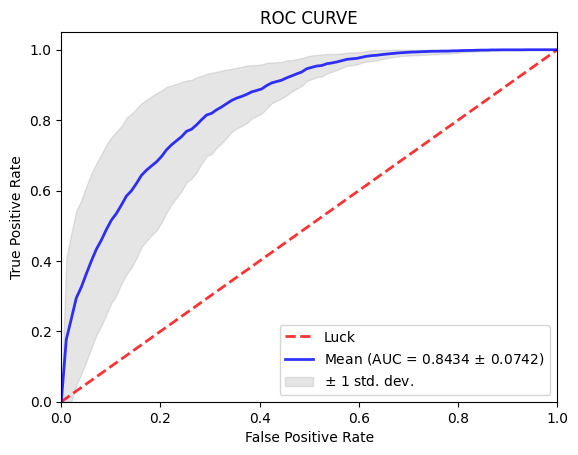

In [8]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True
## dictionaries of fpr tpr ## 
fpr = {}
tpr = {}
roc_auc = {}
precision = {}
recall = {}
average_precision = {}
balanced = False
# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser, balanced = balanced)
    ## the last label is 1 or -1
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    ## train test split --> shuffle is used there ## if not used then data will be divided as x[0:halfTrainSamples] concatenate with X[positiveSamples: positiveSamples + trainHalfSamples]
    ## where positiveSamples is len(X/2)
    
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    model = SVMModel(dataset, users, weight = "balanced")
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    fpr[legalUser], tpr[legalUser], thr, precision[legalUser], recall[legalUser], average_precision[legalUser] = model.evaluate(X_train, y_train, X_validation, y_validation, user = legalUser, num_actions=1)
    threshold = -1
    try:
        eer = brentq(lambda x: 1. - x - interp1d(fpr[legalUser], tpr[legalUser])(x), 0., 1.) ## Equal Error Rate //brentq znajdowanie 0 , interpid interpolacja
        threshold = interp1d(fpr[legalUser], thr)(eer)

    except (ZeroDivisionError, ValueError):
        print("Division by zero")

    roc_auc[legalUser] = auc(fpr[legalUser], tpr[legalUser])
    print(f"{legalUser}: {roc_auc[legalUser]:.3f} threshold: {threshold:.3f}")
    print(f"{legalUser}: Average Precision: {average_precision[legalUser]}")

plotROCs(fpr, tpr, roc_auc, users)

roc_path = f'wykresy\\SVM{limit}Balabit_balanced{balanced}ROC'
pr_path = f'wykresy\\SVM{limit}Balabit_balanced{balanced}PR'
plotROCs(fpr, tpr, roc_auc, users,False, True, roc_path)
plot_precisions_recalls(precision, recall, average_precision, True, pr_path)


In [9]:
# users = [1,2, 3, 5, 4,16,20,21,23] # a few users
limit = 1000
users = [i for i in range (1,29)] ## all users 
chaoshen_reader = DataReaderChaoShen(CHAOSHEN, users, limit = limit)
chaoshen_reader.processDataWithoutLabels()

File already exist


In [10]:

path = chaoshen_reader.getFileName()
chaoShenAnalyser = nonLegalityAnalyser(path)
print(chaoShenAnalyser.countActions())

type_of_action     1    3    4
userid                        
1                426  494  214
2                721  155  334
3                498  422  174
4                713  462  149
5               1080  411  168
6                776  472  167
7                558  412  269
8                576  485  160
9                622  436  146
10               838  279  257
11               826  394  181
12              2232  360  176
13               944  330  132
14               756  340  172
15               576  470  151
16               763  401  166
17               575  455  156
18               812  400  125
19              1013  440  107
20               656  233  155
21               688  212  131
22               787  218  246
23               513  478  239
24               559  406  301
25               657  441  248
26               622  325  314
27               553  418  239
28               860  419  153


## Random Forest

In [11]:
from RandomForestModel import *

User 1 is being analyzed:
CV Accuracy: 0.96 (+/- 0.00)
Test Accuracy: 0.96
1: 0.849 threshold: 0.050
1: Average Precision: 0.2550921490226161
User 2 is being analyzed:
CV Accuracy: 0.98 (+/- 0.01)
Test Accuracy: 0.98
2: 0.908 threshold: 0.049
2: Average Precision: 0.5771823875585023
User 3 is being analyzed:
CV Accuracy: 0.97 (+/- 0.00)
Test Accuracy: 0.97
3: 0.840 threshold: 0.061
3: Average Precision: 0.27313667219573956
User 4 is being analyzed:
CV Accuracy: 0.94 (+/- 0.01)
Test Accuracy: 0.94
4: 0.800 threshold: 0.097
4: Average Precision: 0.13586308914109937
User 5 is being analyzed:
CV Accuracy: 0.94 (+/- 0.01)
Test Accuracy: 0.94
5: 0.871 threshold: 0.121
5: Average Precision: 0.26520979714601556
User 6 is being analyzed:
CV Accuracy: 0.96 (+/- 0.00)
Test Accuracy: 0.96
6: 0.804 threshold: 0.073
6: Average Precision: 0.22683242754803523
User 7 is being analyzed:
CV Accuracy: 0.96 (+/- 0.00)
Test Accuracy: 0.96
7: 0.829 threshold: 0.087
7: Average Precision: 0.21434431811834842
U

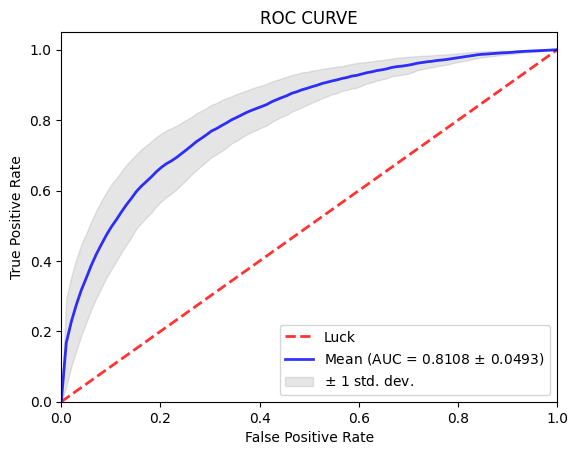

In [16]:
tpr = {}
roc_auc = {}
shuffle = True
precision = {}
recall = {}
average_precision = {}
balanced = False
fpr = {}

for legalUser in users:
    dataset = chaoShenAnalyser.createTrainingDataWithLabel(legalUser, balanced= balanced)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    X_train, X_validation, y_train, y_validation = chaoShenAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    model = RandomForestModel(dataset, users, weight = "balanced")
    fpr[legalUser], tpr[legalUser], thr, precision[legalUser], recall[legalUser], average_precision[legalUser] = model.evaluate(X_train, y_train, X_validation, y_validation, scale = False, user = legalUser, num_actions=1)
    threshold = -1
    try:
        eer = brentq(lambda x: 1. - x - interp1d(fpr[legalUser], tpr[legalUser])(x), 0., 1.) ## brentq znajdowanie 0 , interpid interpolacja
        threshold = interp1d(fpr[legalUser], thr)(eer)

    except (ZeroDivisionError, ValueError):
        print("Division by zero")

    roc_auc[legalUser] = auc(fpr[legalUser], tpr[legalUser])
    print(f"{legalUser}: {roc_auc[legalUser]:.3f} threshold: {threshold:.3f}")
    print(f"{legalUser}: Average Precision: {average_precision[legalUser]}")

plotROCs(fpr, tpr, roc_auc, users)


roc_path = f'wykresy\\RF{limit}chaoshen_balanced{balanced}ROC'
pr_path = f'wykresy\\RF{limit}chaoshen_balanced{balanced}PR'
plotROCs(fpr, tpr, roc_auc, users,False, True, roc_path)
plot_precisions_recalls(precision, recall, average_precision, True, pr_path)

## SVM

User 1 is being analyzed:
CV Accuracy: 0.66 (+/- 0.14)
Test Accuracy: 0.74
1: 0.783 threshold: 0.522
1: Average Precision: 0.7595272898376366
User 2 is being analyzed:
CV Accuracy: 0.75 (+/- 0.19)
Test Accuracy: 0.68
2: 0.699 threshold: 0.462
2: Average Precision: 0.6466122360169313
User 3 is being analyzed:
CV Accuracy: 0.63 (+/- 0.12)
Test Accuracy: 0.65
3: 0.697 threshold: 0.530
3: Average Precision: 0.671101823172531
User 4 is being analyzed:
CV Accuracy: 0.63 (+/- 0.06)
Test Accuracy: 0.61
4: 0.652 threshold: 0.500
4: Average Precision: 0.6532436253343306
User 5 is being analyzed:
CV Accuracy: 0.63 (+/- 0.08)
Test Accuracy: 0.71
5: 0.661 threshold: 0.526
5: Average Precision: 0.5704163247115217
User 6 is being analyzed:
CV Accuracy: 0.58 (+/- 0.16)
Test Accuracy: 0.57
6: 0.620 threshold: 0.462
6: Average Precision: 0.5819796207620103
User 7 is being analyzed:
CV Accuracy: 0.65 (+/- 0.11)
Test Accuracy: 0.61
7: 0.664 threshold: 0.474
7: Average Precision: 0.6287145395333571
User 8 

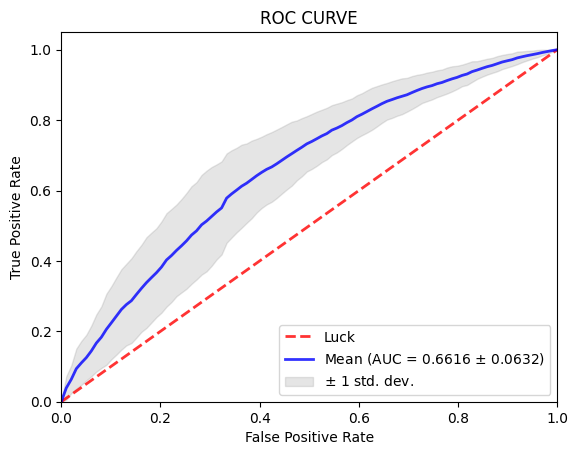

In [17]:
tpr = {}
roc_auc = {}
shuffle = False
precision = {}
recall = {}
average_precision = {}
balanced = True
fpr = {}
for legalUser in users:
    dataset = chaoShenAnalyser.createTrainingDataWithLabel(legalUser)    
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    X_train, X_validation, y_train, y_validation = chaoShenAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    model = SVMModel(dataset, users, kernel = 'rbf', C= 10)
    fpr[legalUser], tpr[legalUser], thr, precision[legalUser], recall[legalUser], average_precision[legalUser] = model.evaluate(X_train, y_train, X_validation, y_validation, user = legalUser, num_actions=1)
    threshold = -1
    try:
        eer = brentq(lambda x: 1. - x - interp1d(fpr[legalUser], tpr[legalUser])(x), 0., 1.) ## brentq znajdowanie 0 , interpid interpolacja
        threshold = interp1d(fpr[legalUser], thr)(eer)

    except (ZeroDivisionError, ValueError):
        print("Division by zero")

    roc_auc[legalUser] = auc(fpr[legalUser], tpr[legalUser])
    print(f"{legalUser}: {roc_auc[legalUser]:.3f} threshold: {threshold:.3f}")
    print(f"{legalUser}: Average Precision: {average_precision[legalUser]}")

plotROCs(fpr, tpr, roc_auc, users)



roc_path = f'wykresy\\SVM{limit}chaoshen_balanced{balanced}ROC'
pr_path = f'wykresy\\SVM{limit}chaoshen_balanced{balanced}PR'
plotROCs(fpr, tpr, roc_auc, users,False, True, roc_path)
plot_precisions_recalls(precision, recall, average_precision, True, pr_path)